*Contenuti*
===
- [Il dataset *Titanic*](#Il-dataset-Titanic)
- [La libreria Pandas](#La-libreria-Pandas)
- [*Series*, accesso, slicing e rimozione](#Series,-accesso,-slicing-e-rimozione)  
- [Costruzione di nuove colonne](#Costruzione-di-nuove-colonne)
    - [*Esercizio 1*](#Esercizio-1)
- [La funzione *groupby*](#La-funzione-groupby)
    - [*Esercizio 2*](#Esercizio-2)
- [La libreria *seaborn*](#La-libreria-seaborn)
- [Altri costrutti utili](#Altri-costrutti-utili)
    - [Codifica *one-hot*](#Codifica-one-hot)
    - [*aggregate* e *NamedAgg*](#aggregate-e-NamedAgg)
        - [*Esercizio 3*](#Esercizio-3)

# Il dataset *Titanic*

Il dataset di questo notebook è preso da [*Kaggle*](https://www.kaggle.com/c/titanic).

# La libreria Pandas

*Pandas* è la libreria di Python per la visualizzazione, manipolazione e analisi dei dati.

Alcune risorse utili:
- [Getting started](https://pandas.pydata.org/docs/getting_started/index.html)
- [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#min)
- [Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html)

In [1]:
import pandas as pd

pd.__version__

'2.0.3'

Iniziamo caricando i dati con la funzione *read_csv*. Per ulteriori opzioni di utilizzo di questa (quale separatore usare, quali colonne caricare e se trasformarle, ecc.) e di altre funzioni, premere

        Shift-Tab-Tab
        
dopo il nome della funzione o cercare [nella documentazione](https://pandas.pydata.org/pandas-docs/stable/).

In [2]:
df = pd.read_csv('data/titanic.csv', index_col='PassengerId')

Cosa c'è dentro il *DataFrame* df? Le funzioni *head* e *info* mostrano rispettivamente le prime (di default 5) righe del dataset e alcune informazioni sulle variabili, come il tipo e i dati mancanti.

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# *Series*, accesso, slicing e rimozione

Un DataFrame Pandas eredita alcune delle proprietà di un array NumPy.

In [5]:
df.shape

(891, 11)

Pandas aggiunge ad un array NumPy la semantica (le colonne hanno un nome) e una struttura di indici.

In [6]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Il nome delle colonne può essere cambiato:
- alterando la lista *df.columns*
- con la funzione *rename*.

In [7]:
df.rename(columns={'Sex':'Gender'}, inplace=True)

In [8]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Ciascuna colonna è detta *Series*. Si può accedere ai valori di una Series attraverso il suo nome. Vediamo alcuni esempi.

In [9]:
df['Name'].head(15)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
11                      Sandstrom, Miss. Marguerite Rut
12                             Bonnell, Miss. Elizabeth
13                       Saundercock, Mr. William Henry
14                          Andersson, Mr. Anders Johan
15                 Vestrom, Miss. Hulda Amanda Adolfina
Name: Name, dtype: object

In [10]:
df.Gender.value_counts()

Gender
male      577
female    314
Name: count, dtype: int64

Ci sono altri modi di accedere ai valori di un DataFrame. *iloc* (che sta per *integer location*) permette di farlo come su array NumPy.

In [11]:
df.iloc[:3, 1:6]

,Pclass,Name,Gender,Age,SibSp
PassengerId,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0


E' possibile estrarre un insieme di colonne a partire dal loro nome con la sintassi

        df[col_list]

In [12]:
df[['Gender', 'Age', 'Survived']].head(10)

,Gender,Age,Survived
PassengerId,,,
1,male,22.0,0
2,female,38.0,1
3,female,26.0,1
4,female,35.0,1
5,male,35.0,0
6,male,NaN,0
7,male,54.0,0
8,male,2.0,0
9,female,27.0,1


La funzione *describe* riporta le principale statistiche di una singola colonna o di un DataFrame.

In [13]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [14]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [15]:
df[['Age', 'Fare']].describe().round(3)

,Age,Fare
count,714.000,891.000
mean,29.699,32.204
std,14.526,49.693
min,0.420,0.000
25%,20.125,7.910
50%,28.000,14.454
75%,38.000,31.000
max,80.000,512.329


Con la sintassi

        df[condition(df)]
        
isoliamo le righe di un dataframe che rispettano un certo criterio (la condizione booleana *condition*).

In [16]:
df[df['Gender'] == 'female'].head()

,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


La colonna *Ticket* (codice identificativo del biglietto) è una buona feature per l'addestramento di un modello predittivo? Perché?

In [17]:
df['Ticket'].head(15)

PassengerId
1            A/5 21171
2             PC 17599
3     STON/O2. 3101282
4               113803
5               373450
6               330877
7                17463
8               349909
9               347742
10              237736
11             PP 9549
12              113783
13           A/5. 2151
14              347082
15              350406
Name: Ticket, dtype: object

Le funzione *drop* permette di eliminare una o più colonne da un DataFrame. Eliminiamo la colonna Ticket.

In [18]:
df = df.drop(columns=['Ticket'])

In [19]:
'Ticket' in df.columns

False

# Costruzione di nuove colonne

Pandas può essere utilizzata per costruire nuove feature (quindi colonne, Series) a partire da quelle esistenti. Ecco alcuni esempi.

In [20]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['LastName'] = df['Name'].apply(lambda name: name.split(',')[0])

In [21]:
df[['Name', 'LastName']].head()

,Name,LastName
PassengerId,,
1,"Braund, Mr. Owen Harris",Braund
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings
3,"Heikkinen, Miss. Laina",Heikkinen
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle
5,"Allen, Mr. William Henry",Allen


Qui sopra, la funzione *lambda* passata come argomento ad *apply* viene applicata a tutti gli elementi della Series *Name*.

### *Esercizio 1*

Costruire la colonna *Title* (es: Mr, Mrs, Miss...) a partire dal nome dei passeggeri.

La contessa è sopravvissuta?

In [22]:
#FILLME

---

# La funzione *groupby*

Supponiamo di voler calcolare il prezzo medio del biglietto in base alla classe.

In [23]:
df.groupby('Pclass')['Fare'].apply(lambda x : x.mean())

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

La funzione *groupby* serve per organizzare un DataFrame in gruppi. Nell'esempio qui sotto, la funzione
- raggruppa i dati in base alla variabile categorica *Pclass*
- estrae dai tre gruppi (uno per ogni classe) la colonna *Fare*, sotto forma di Series di valori numerici
- per ognuno di questi vettori (denotati nel codice da $x$) esegue un'operazione aggregata, in questo caso *mean*.

Alcune operazioni aggregate hanno associata una shortcut.

In [24]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [25]:
groups = df.groupby('Pclass')

groups

In [26]:
groups.get_group(1)['Fare']

PassengerId
2      71.2833
4      53.1000
7      51.8625
12     26.5500
24     35.5000
        ...   
872    52.5542
873     5.0000
880    83.1583
888    30.0000
890    30.0000
Name: Fare, Length: 216, dtype: float64

In [27]:
groups.get_group(1)['Fare'].mean()

84.1546875

Possiamo costruire gruppi anche in base a più variabili categoriche.

In [28]:
df.groupby(['Pclass', 'Embarked'])['Fare'].mean()

Pclass  Embarked
1       C           104.718529
        Q            90.000000
        S            70.364862
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64

Quanto sono numerosi i gruppi?

In [29]:
df.groupby(['Pclass', 'Embarked'])['Fare'].count()

Pclass  Embarked
1       C            85
        Q             2
        S           127
2       C            17
        Q             3
        S           164
3       C            66
        Q            72
        S           353
Name: Fare, dtype: int64

In [30]:
df[['Pclass', 'Embarked']].value_counts()

Pclass  Embarked
3       S           353
2       S           164
1       S           127
        C            85
3       Q            72
        C            66
2       C            17
        Q             3
1       Q             2
Name: count, dtype: int64

In [31]:
pd.crosstab(df['Pclass'], df['Embarked'])

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


In [32]:
pd.crosstab(df['Pclass'], df['Embarked'], normalize=True).round(3)

Embarked,C,Q,S
Pclass,,,
1,0.096,0.002,0.143
2,0.019,0.003,0.184
3,0.074,0.081,0.397


## Esercizio 2


Supponiamo di voler predire se un passeggero sopravviverà o meno. In altre parole, la colonna *Survived* diventa il nostro target.

Per prima cosa, abbiamo bisogno di una *baseline*. Costruiamo il modello $M_{gender}$, che assegna 1 alle donne (ipotizzando quindi che sopravvivano tutte) e 0 agli uomini. È un buon modello?

Calcolare l'accuratezza del modello $M_{gender}$ sul training set.

**Hint**: di che ingredienti abbiamo bisogno?

In [33]:
#FILL ME

---

# La libreria *seaborn*

Per la visualizzazione statistica dei dati Pandas si appoggia alla libreria *seaborn*. 

[Qui](https://seaborn.pydata.org/tutorial) trovate una sezione *User guide and tutorial* fatta molto bene; si tratta di un'ottima risorsa per capire "quando usare quale grafico", in base all'obiettivo dell'analisi e al numero e tipo delle variabili interessate.

[Qui](https://seaborn.pydata.org/examples/index.html) c'è una carrellata di esempi sui singoli grafici.

La libreria supporta l'interazione coi DataFrame Pandas. Vediamo alcuni esempi di utilizzo.

In [34]:
import seaborn as sns

<Axes: xlabel='Gender', ylabel='count'>

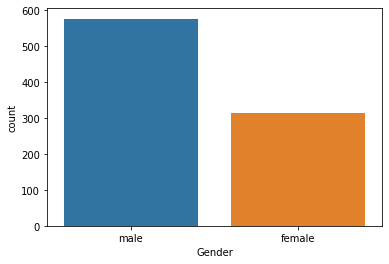

In [35]:
sns.countplot(data=df, x='Gender')

Attraverso la funzione *set* impostiamo lo stile grafico di seaborn.

In [36]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

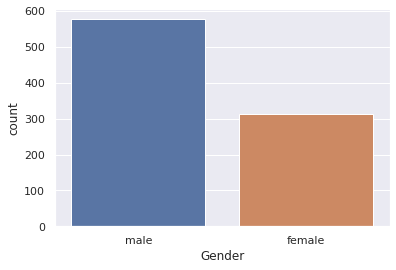

In [37]:
sns.countplot(data=df, x='Gender')

<Axes: xlabel='count', ylabel='Gender'>

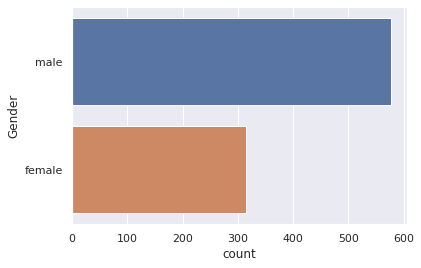

In [38]:
sns.countplot(data=df, y='Gender')

La funzione *catplot* permette di realizzare plot in cui si analizza il rapporto tra una variabile numerica e una o più variabili categoriche.

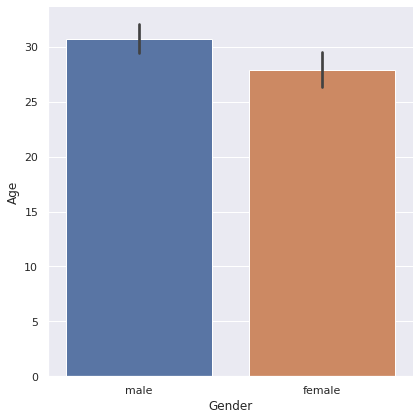

In [39]:
sns.catplot(data=df,
            x='Gender',
            y='Age',            
            kind='bar',
            height=6)

In [40]:
df.groupby('Gender')['Age'].mean()

Gender
female    27.915709
male      30.726645
Name: Age, dtype: float64

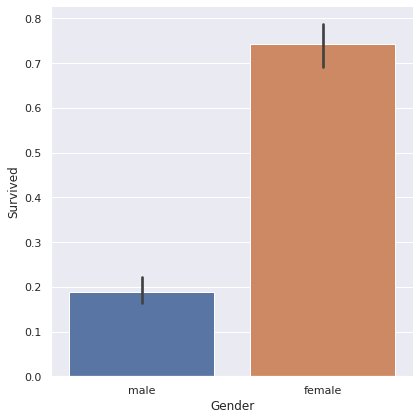

In [41]:
sns.catplot(data=df,
            x='Gender',
            y='Survived',            
            kind='bar',
            height=6)

Attraverso l'argomento *hue*, le funzioni di seaborn permettono di "colorare" i grafici in base al valore di una variabile categorica.

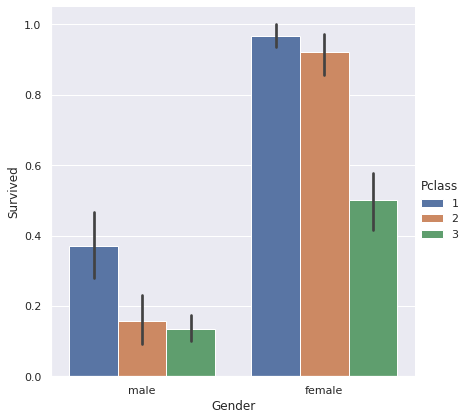

In [42]:
sns.catplot(data=df,
            x='Gender',
            y='Survived',
            hue='Pclass',
            kind='bar',
            height=6)

In [43]:
df.groupby(['Gender','Pclass']).Survived.mean()

Gender  Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

Fin qui abbiamo estratto un singolo valore (la media) da ogni gruppo. Adesso siamo interessati ad analizzare la *distribuzione* dei valori in ogni gruppo.

Iniziamo dalla distribuzione della variabile Age su tutto il campione dei dati di addestramento. Possiamo utilizzare la funzione *displot*.

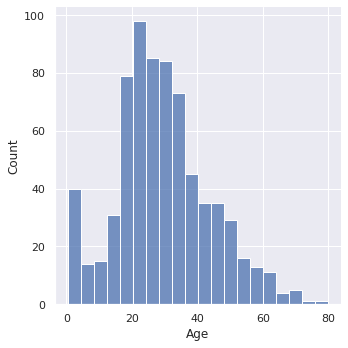

In [44]:
sns.displot(data=df, x='Age')

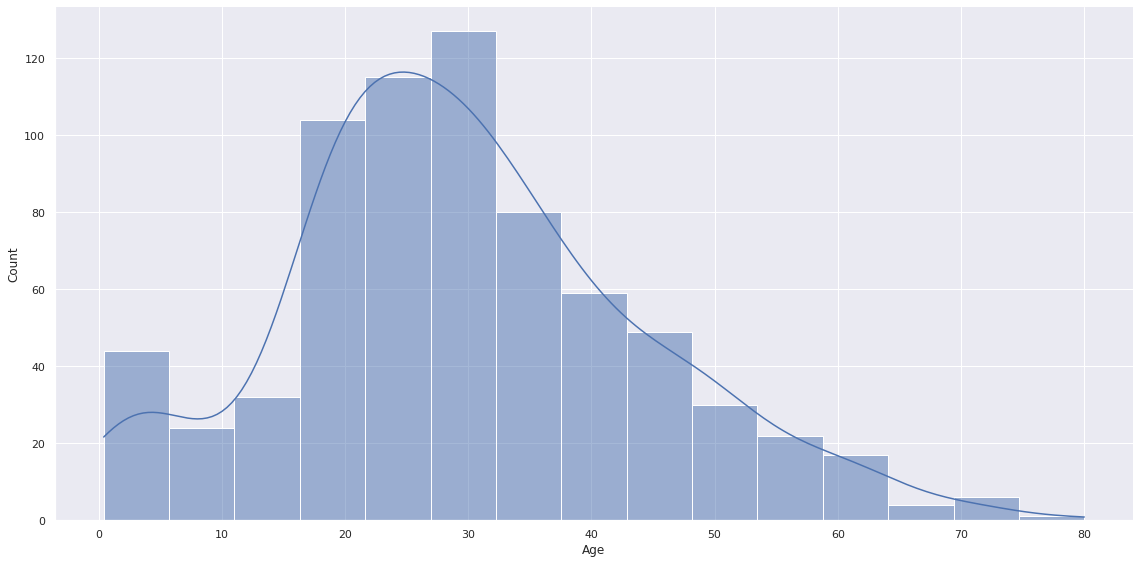

In [45]:
sns.displot(data=df,
            x='Age',
            height=8,
            aspect=2,
            kde=True,
            bins=15)

Che forma ha questa distribuzione?

Un [*boxplot*](https://www.data-to-viz.com/caveat/boxplot.html) permette di "riassumere" una distribuzione con pochi valori.

<Axes: ylabel='Age'>

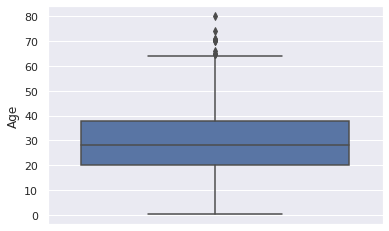

In [46]:
sns.boxplot(data=df, y='Age')

Con la funzione omonima di seaborn è possibile realizzare boxplot categorici, utili per confrontare le distribuzioni in gruppi differenti.

<Axes: xlabel='Gender', ylabel='Age'>

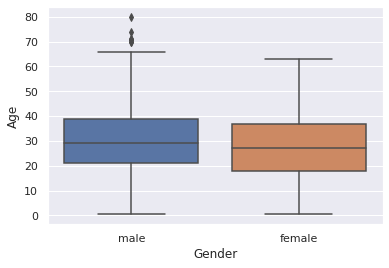

In [47]:
sns.boxplot(data=df,
            x='Gender',
            y='Age')

Quali sono i limiti/difetti di un boxplot? In quali casi non è una rappresentazione esaustiva?

<Axes: xlabel='Gender', ylabel='Age'>

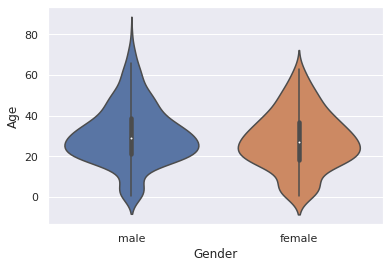

In [48]:
sns.violinplot(data=df,
               x='Gender',
               y='Age')

Un *violinplot* contiene le stesse informazioni del boxplot, oltre a riportare *la forma* della distribuzione dei valori numerici. Vediamo alcuni esempi.

<Axes: xlabel='Gender', ylabel='Age'>

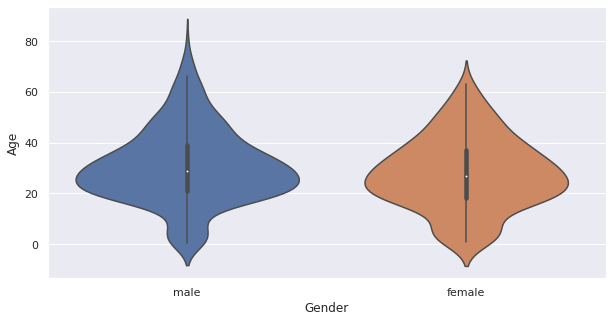

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.violinplot(data=df,
               x='Gender',
               y='Age')

<Axes: xlabel='Age', ylabel='Gender'>

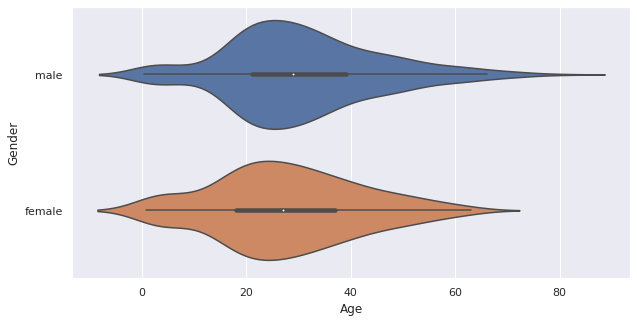

In [50]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df,
               y='Gender',
               x='Age',
               orient='h')

Attraverso gli argomenti hue e *split* è possibile aggiungere un ulteriore livello.

<Axes: xlabel='Age', ylabel='Pclass'>

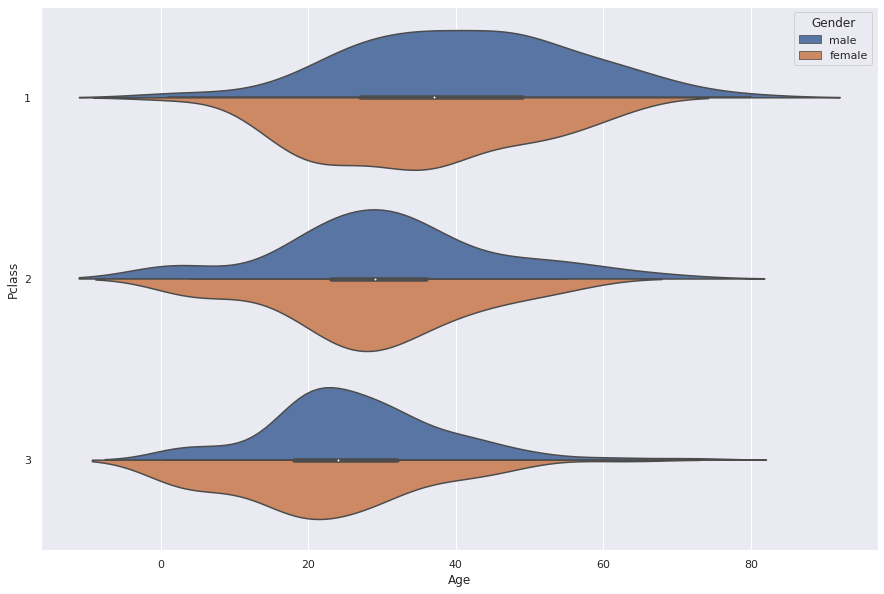

In [51]:
plt.figure(figsize=(15,10))
sns.violinplot(data=df,
               y='Pclass',
               x='Age',
               orient='h',
               hue='Gender',
               split=True)

Per realizzare lo split su un unico violinplot è necessario costruire una variabile fittizia.

<Axes: ylabel='Age'>

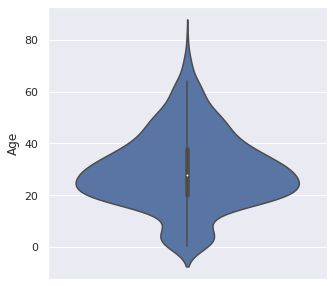

In [52]:
plt.figure(figsize=(5,5))
sns.violinplot(data=df,
               y='Age',
               hue='Survived',
               split=True)

In [53]:
df['alldata'] = 1

<Axes: xlabel='alldata', ylabel='Age'>

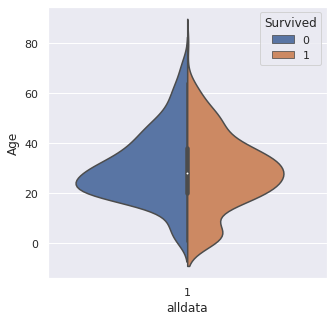

In [54]:
plt.figure(figsize=(5,5))
sns.violinplot(data=df,
               x='alldata',
               y='Age',
               hue='Survived',
               split=True)

In [55]:
df.drop(columns=['alldata'], inplace=True)

Un'altro modo di confrontare le distribuzioni di una variabile numerica su gruppi differenti è il tipo *swarm* di catplot.

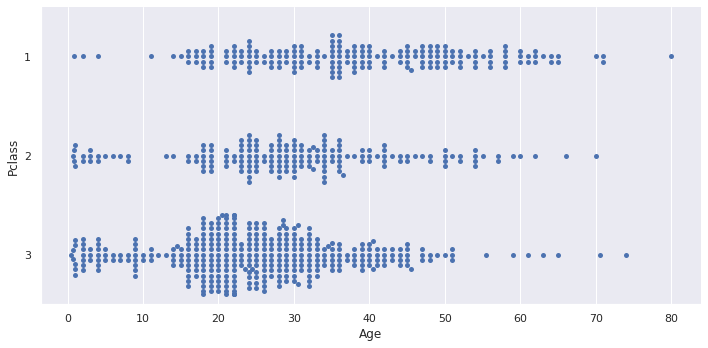

In [56]:
sns.catplot(data=df,
            y='Pclass',
            x='Age',
            kind='swarm',
            orient='h',
            height=5,
            aspect=2)

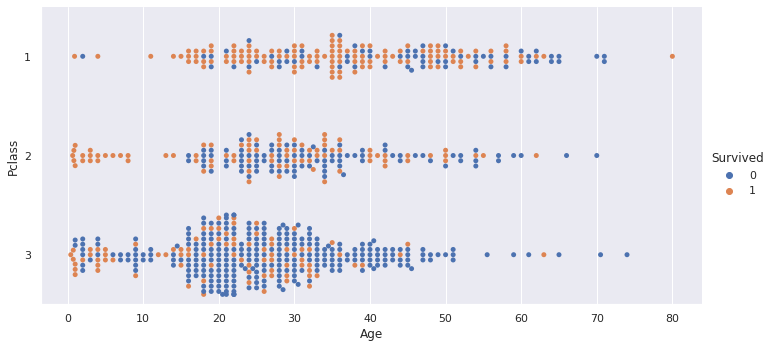

In [57]:
sns.catplot(data=df,
            y='Pclass',
            x='Age',
            hue='Survived',
            kind='swarm',
            orient='h',
            height=5,
            aspect=2)

Non sempre catplot+swarm riesce con successo a rappresentare tutti i punti. Un'alternativa è *stripplot*.

<Axes: xlabel='Embarked', ylabel='Fare'>

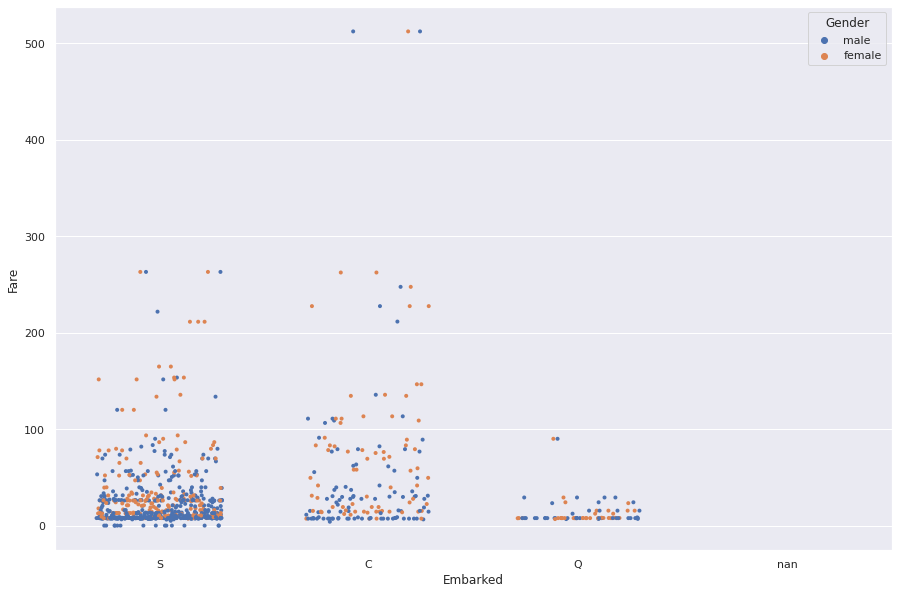

In [58]:
plt.figure(figsize=(15,10))
sns.stripplot(x='Embarked',
              y='Fare',
              hue='Gender',
              data=df,
              jitter=.3,
              size=4)

<Axes: xlabel='Embarked', ylabel='Fare'>

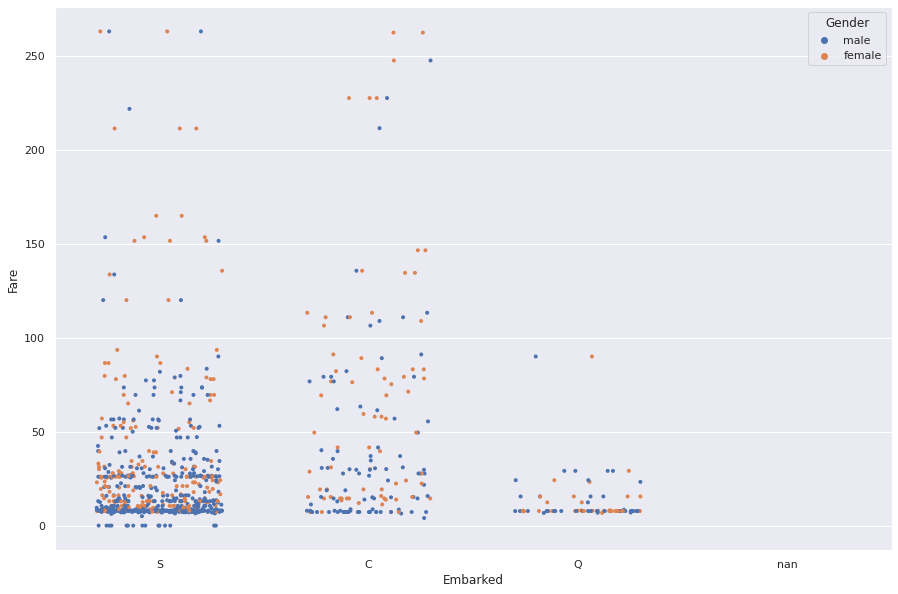

In [59]:
plt.figure(figsize=(15,10))
sns.stripplot(x='Embarked',
              y='Fare',
              hue='Gender',
              data=df[df.Fare<500],
              jitter=.3,
              size=4)

Adesso siamo interessati a visualizzare la distribuzione *bivariata* di una coppia di variabili numeriche.

Attraverso *jointplot* realizziamo un semplice scatterplot, che possiamo colorare con hue.

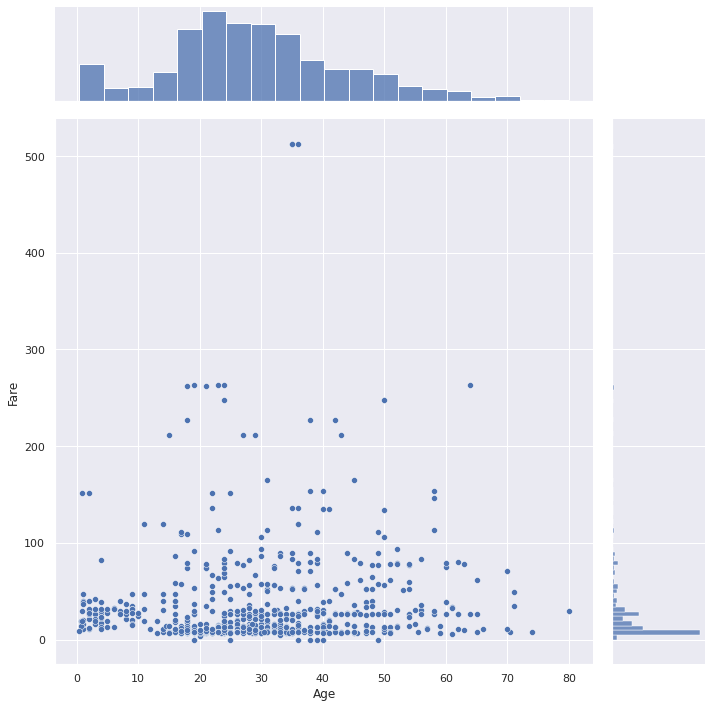

In [60]:
sns.jointplot(data=df,
              x='Age',
              y='Fare',
              height=10)

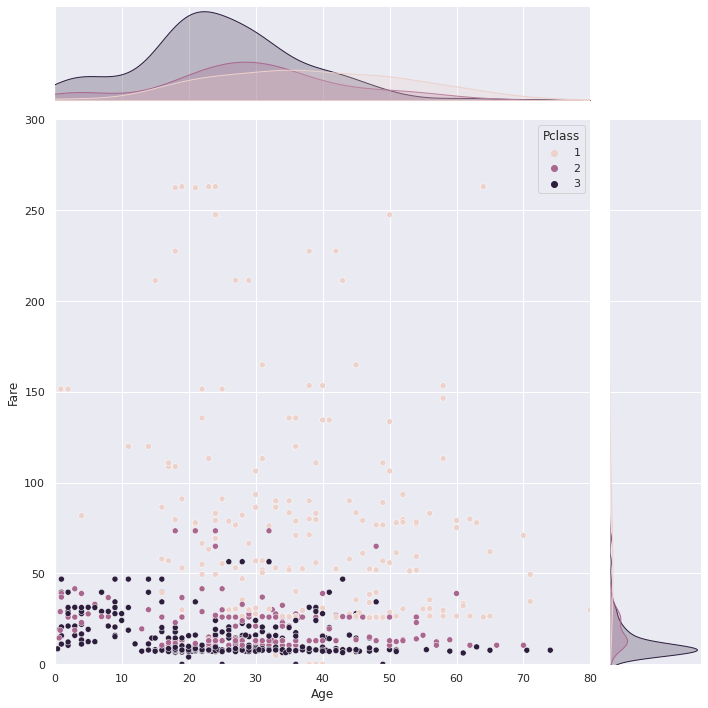

In [61]:
sns.jointplot(data=df,
              x='Age',
              y='Fare',
              hue='Pclass',
              height=10,
              xlim=(0,80),
              ylim=(0,300))

La funzione *pairplot* mostra una griglia di scatterplot di più coppie di variabili.

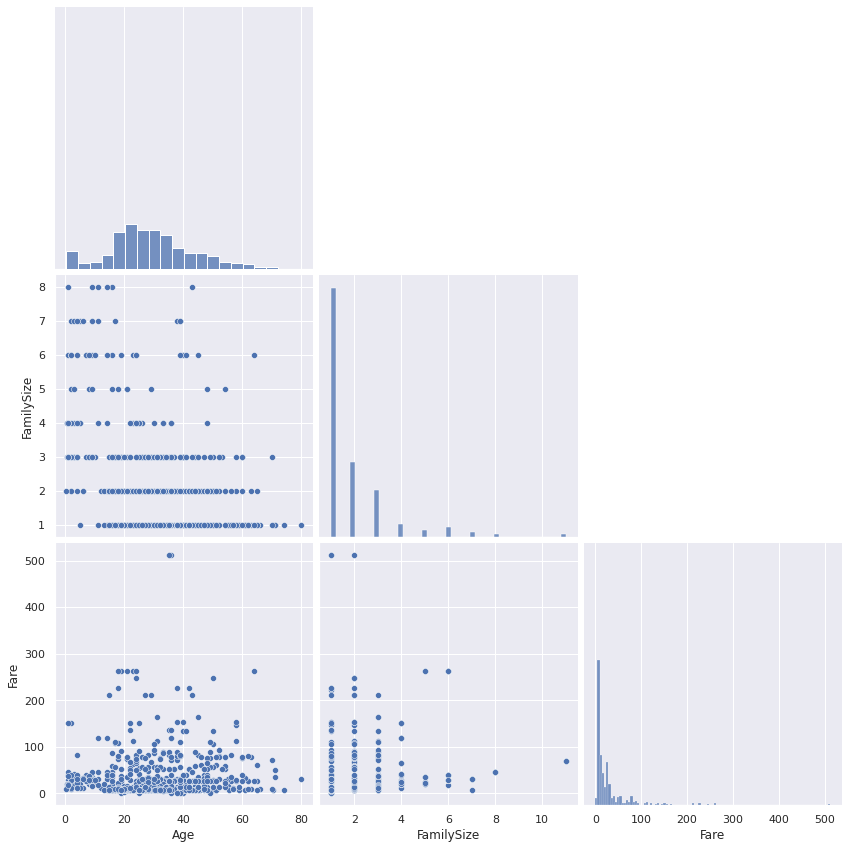

In [62]:
col_subset = ['Age', 'FamilySize', 'Fare']

sns.pairplot(data=df[col_subset],
             height=4,
             corner=True)

Anche pairplot può essere colorato in base ad una variabile categorica.

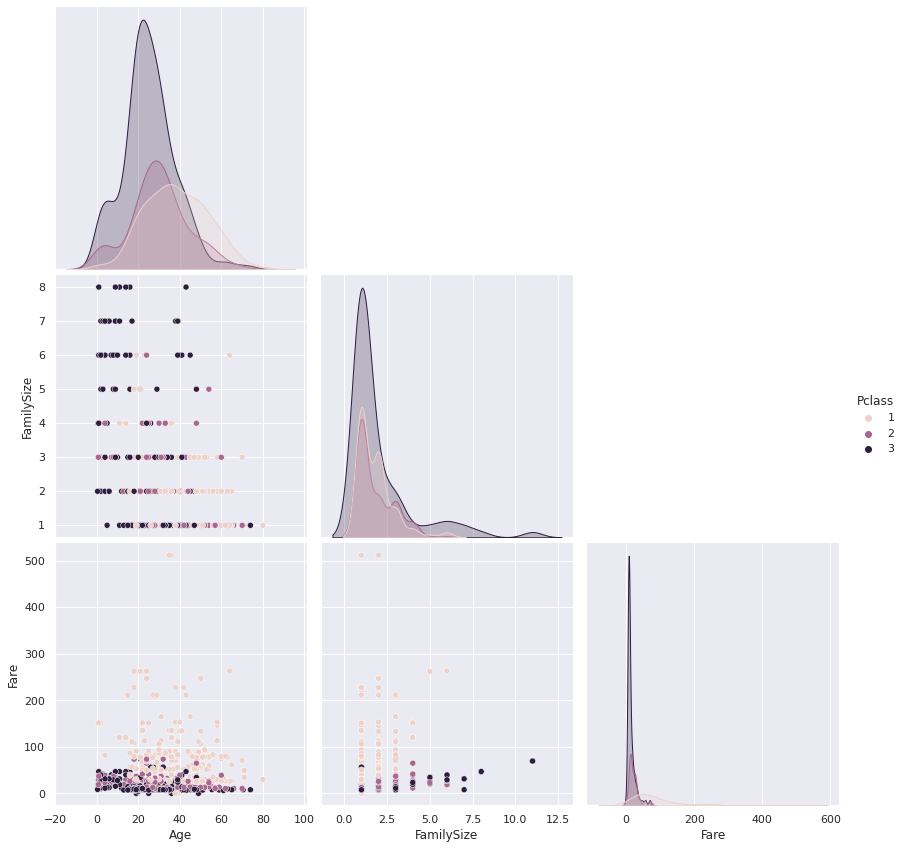

In [63]:
sns.pairplot(data=df,
             x_vars=col_subset,
             y_vars=col_subset,
             hue='Pclass',
             height=4,
             corner=True)

[Qui](https://seaborn.pydata.org/tutorial/distributions.html#visualizing-bivariate-distributions) trovate altri esempi di analisi grafica bivariata. 

# Altri costrutti utili

## Codifica *one-hot*

I valori di una feature categorica *nominale* (per esempio, il gruppo sanguigno o l'etnia) non possono essere semplicementi mappati su numeri interi. 

**Perché?**

**Quali sono le feature nominali di questo dataset?**

Per evitare di creare relazioni spurie tra i valori di una variabile nominale, occorre codificarla in modo *one-hot*. In Pandas, questo si ottiene con la funzione *get_dummies*. Applichiamola sulla feature *Embarked*.

In [64]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [65]:
df = pd.get_dummies(df,
                    prefix=['Emb'],#nuovi prefissi comuni
                    columns=['Embarked'])#lista colonne da codificare

df.head()

,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Fare,Cabin,FamilySize,LastName,Emb_C,Emb_Q,Emb_S
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,2,Braund,False,False,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,2,Cumings,True,False,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,1,Heikkinen,False,False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,2,Futrelle,False,False,True
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,1,Allen,False,False,True


La funzione get_dummies ha trasformato la colonna Embarked in tante colonne (booleane) quanti sono i suoi valori.

In [66]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'FamilySize', 'LastName', 'Emb_C', 'Emb_Q', 'Emb_S'],
      dtype='object')

## *aggregate* e *NamedAgg*

Attraverso la [funzione *aggregate* e il costrutto *NamedAgg*](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation), è possibile estrarre statistiche per gruppo in modo compatto.

In [67]:
df.groupby('Pclass')['Fare'].apply(lambda x : x.mean())

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [68]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [69]:
df.groupby('Pclass')['Fare'].max()

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

In [70]:
df.groupby('Pclass')['Fare'].aggregate(['mean', 'max'])

,mean,max
Pclass,,
1,84.154687,512.3292
2,20.662183,73.5000
3,13.675550,69.5500


In [71]:
df.groupby('Pclass')['Fare'].agg(['mean', 'max'])

,mean,max
Pclass,,
1,84.154687,512.3292
2,20.662183,73.5000
3,13.675550,69.5500


In [78]:
df.groupby('Pclass').agg(mean_fare=pd.NamedAgg(column='Fare', aggfunc='mean'),
                         max_fare=pd.NamedAgg(column='Fare', aggfunc='max'))

,mean_fare,max_fare
Pclass,,
1,84.154687,512.3292
2,20.662183,73.5000
3,13.675550,69.5500


Possiamo sfruttare i [*kwargs* e il costrutto ** di Python](https://stackoverflow.com/questions/36901/what-does-double-star-asterisk-and-star-asterisk-do-for-parameters).

In [80]:
aggregations = {'mean_fare':pd.NamedAgg(column='Fare', aggfunc='mean'),
                'max_fare':pd.NamedAgg(column='Fare', aggfunc='max')}

aggregations

{'mean_fare': NamedAgg(column='Fare', aggfunc='mean'),
 'max_fare': NamedAgg(column='Fare', aggfunc='max')}

In [81]:
df.groupby('Pclass').agg(**aggregations)

,mean_fare,max_fare
Pclass,,
1,84.154687,512.3292
2,20.662183,73.5000
3,13.675550,69.5500


In [85]:
aggregations = {'mean_fare':pd.NamedAgg('Fare', 'mean'),
                'max_fare':pd.NamedAgg('Fare', 'max'),
                'passengers':pd.NamedAgg('Name', 'count'),
                'mean_family_size':pd.NamedAgg('FamilySize', 'mean')}

df.groupby('Pclass').agg(**aggregations).round(2)

,mean_fare,max_fare,passengers,mean_family_size
Pclass,,,,
1,84.15,512.33,216,1.77
2,20.66,73.50,184,1.78
3,13.68,69.55,491,2.01


## Esercizio 3

Utilizzare il costrutto NamedAgg per estrarre, in base al sesso del passeggero:
- l'età media
- il Title più frequente
- la percentuale di valori mancanti della colonna Cabin.

In [76]:
#FILL ME

<script>
  $(document).ready(function(){
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('div.prompt').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter.
</footer>